## Workbench for analysing sinkhole population data at the Dead Sea

### read data

In [120]:
import pandas as pd
import numpy as np

# all holes at zeelim, digitised from Avni et al 2016
zeelim = pd.read_csv('../data/DeadSeaWestHolesZeelim.csv', header=None) 

# all western holes except zeelim, digitised from Avni et al 2016
DS_west_all = pd.read_csv('../data/DeadSeaWestHolesTotal.csv', header=None) 

# all holes at GAH, my own work
GAH = pd.read_csv('../data/SH_total.txt', sep="\t", header=None) #\t sep = tab delimited
#GAH = pd.read_fwf('../data/SH_total.txt') # load txt file using read_fwf (fwf = fixed width formatted)

# name columns
zeelim.columns = ["year", "cum_no_holes"]
DS_west_all.columns = ["year", "cum_no_holes"]
GAH.columns = ["year", "holes"] # holes in that year rather than cumulative no. holes

print('Ze\'elim:', zeelim.dtypes, zeelim.head(), sep='\n')
print('Western Total:', DS_west_all.dtypes, DS_west_all.head(), sep='\n')
print('Ghor Al-Haditha:', GAH.dtypes, GAH.head(), sep='\n');

Ze'elim:
year            float64
cum_no_holes    float64
dtype: object
          year  cum_no_holes
0  1999.966755      0.418240
1  2002.759309     10.740664
2  2003.573803     20.655086
3  2004.900266     25.448267
4  2005.877660     26.568447
Western Total:
year            float64
cum_no_holes    float64
dtype: object
          year  cum_no_holes
0  1980.000000      0.000000
1  1996.848404    223.470550
2  1999.966755    414.739580
3  2002.014628    752.411946
4  2002.736037    851.536665
Ghor Al-Haditha:
year     int64
holes    int64
dtype: object
   year  holes
0  1985      7
1  1986      2
2  1992     19
3  1994     37
4  1995      6


### clean data

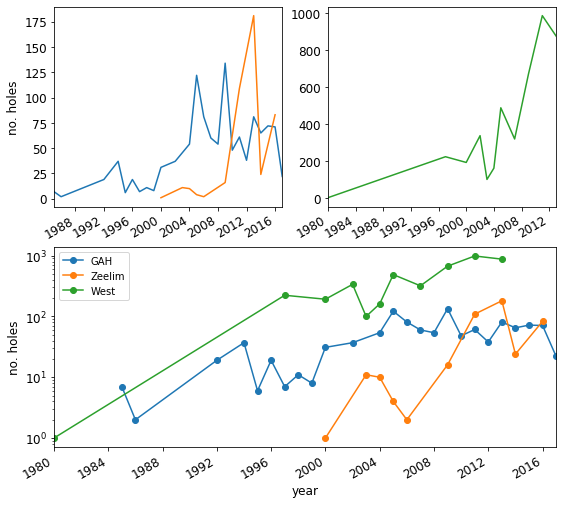

In [145]:
# round values in zeelim and DS west, convert to integers
zeelim = zeelim.round().astype('int64')
DS_west_all = DS_west_all.round().astype('int64')

# convert years to datetime format, set to index
GAH.index = pd.to_datetime(GAH.year, format='%Y') # sets date to 01-01-year by default
zeelim.index = pd.to_datetime(zeelim.year, format='%Y')
DS_west_all.index = pd.to_datetime(DS_west_all.year, format='%Y')

# reverse cumulative nature of western data to get number of holes per year
zeelim['holes'] = zeelim.cum_no_holes.diff(1)
zeelim = zeelim.fillna(1)
zeelim.holes = zeelim.holes.astype('int64') # warning as data copied from another column in dataframe

DS_west_all['holes'] = DS_west_all.cum_no_holes.diff(1)
DS_west_all = DS_west_all.fillna(1)
DS_west_all.holes = DS_west_all.holes.astype('int64')

#print('Ze\'elim:', zeelim.dtypes, zeelim.head(), sep='\n')
#print('Western Total:', DS_west_all.dtypes, DS_west_all.head(), sep='\n')
#print('Ghor Al-Haditha:', GAH.dtypes, GAH.head(), sep='\n');

# use pandas to plot initial data
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (9, 9), constrained_layout=True)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1:])
ax3 = fig.add_subplot(gs[1:, :])

GAH['holes'].plot(x='year',fontsize=12,ax=ax1)
zeelim['holes'].plot(x='year', fontsize=12, ax=ax1)
DS_west_all['holes'].plot(x='year', fontsize=12, ax=ax2, color='C2')

ax1.set_xlabel(None)
ax2.set_xlabel(None)
ax1.set_ylabel('no. holes', fontsize=12)

# plot all data in one subplot across bottom row using gridspec
GAH['holes'].plot(ax=ax3, x='year',fontsize=12, label='GAH', marker='o', color='C0')
zeelim['holes'].plot(ax=ax3, x='year', fontsize=12, label='Zeelim',marker='o', color='C1')
DS_west_all['holes'].plot(ax=ax3,x='year', fontsize=12, label='West',marker='o', color='C2')

ax3.set_xlabel('year', fontsize=12)
ax3.set_ylabel('no. holes', fontsize=12)
ax3.set_yscale('log')
plt.legend();

In [146]:
# alternative method of reversing the cumulative nature of the data
def reverseCum(df.series):
    cumulative = df.series
    output = [0] * len(cumulative)
    for i in range(0, len(cumulative)-1):
        output[(i+1)] = cumulative[(i+1)] - cumulative[(i)]
    output[0] = cumulative[0]
    df['discrete'] = output
    return output

reverseCum(zeelim.cum_no_holes)

SyntaxError: invalid syntax (<ipython-input-146-04b6f478b326>, line 2)

## resample and interpolate

In [31]:
# resample and interpolate data as appropriate

# create column for cumulative and non-cumulative holes as appropriate


## plot data